# Load the Dataset

Date
2005-01-01    571
2005-01-02    572
2005-01-03    574
2005-01-04    576
2005-01-05    577
Name: ETR, dtype: int64


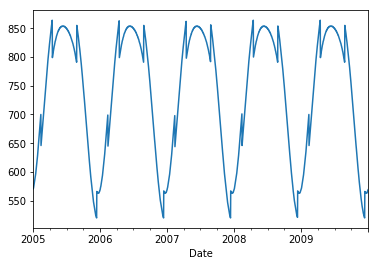

In [6]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('miamidata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [8]:
%matplotlib inline

In [9]:
df = read_csv('miamidata.csv')

In [10]:
df.head()

,Date,ETR
0,2005-01-01,571
1,2005-01-02,572
2,2005-01-03,574
3,2005-01-04,576
4,2005-01-05,577


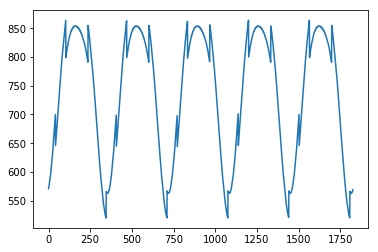

In [11]:
plt.plot(df['ETR'])

# Dickey-Fuller Stationarity Test

In [12]:
X = df['ETR'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

if result[0] < result[4]['5%']:
    print ("Reject Ho Null Hypothesis is Stationary")
else:
    print("Failed to reject Ho - Time Series is Non Stationary")


ADF Statistic: -3.326505
p-value: 0.013734
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho Null Hypothesis is Stationary


# ARIMA (1,0,1) Test

Test RMSE: 6.589
Test MAE: 2.785


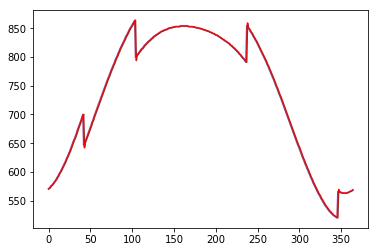

In [13]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('miamidata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [17]:
# fit model
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(1, 1)   Log Likelihood               -4826.015
Method:                       css-mle   S.D. of innovations              6.568
Date:                Fri, 19 Jun 2020   AIC                           9660.029
Time:                        20:59:52   BIC                           9681.177
Sample:                             0   HQIC                          9667.918
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        661.7908     88.888      7.445      0.000     487.573     836.008
ar.L1.y        0.9984      0.001    782.734      0.000       0.996       1.001
ma.L1.y        0.0728      0.024      2.971      0.0

# ARIMA (1,0,0) Test

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('miamidata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 6.603
Test MAE: 2.877


<Figure size 640x480 with 1 Axes>

In [2]:
# fit model
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(1, 0)   Log Likelihood               -4830.434
Method:                       css-mle   S.D. of innovations              6.588
Date:                Fri, 19 Jun 2020   AIC                           9666.867
Time:                        22:26:05   BIC                           9682.728
Sample:                             0   HQIC                          9672.784
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        656.4303     92.016      7.134      0.000     476.082     836.778
ar.L1.y        0.9986      0.001    869.097      0.000       0.996       1.001
                                    Roots           

# ARIMA (0,0,1) Test

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('miamidata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-365], X[-365:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 57.351
Test MAE: 50.579


<Figure size 640x480 with 1 Axes>

In [3]:
# fit model
model = ARIMA(train, order=(0,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1461
Model:                     ARMA(0, 1)   Log Likelihood               -7990.195
Method:                       css-mle   S.D. of innovations             57.351
Date:                Fri, 19 Jun 2020   AIC                          15986.389
Time:                        22:26:19   BIC                          16002.250
Sample:                             0   HQIC                         15992.306
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        737.7481      2.936    251.238      0.000     731.993     743.503
ma.L1.y        0.9577      0.005    189.975      0.000       0.948       0.968
                                    Roots           

            ETR
Date           
2005-01-01  571
2005-01-02  572
2005-01-03  574
2005-01-04  576
2005-01-05  577
2005-01-06  579
2005-01-07  581
2005-01-08  583
2005-01-09  585
2005-01-10  587
2005-01-11  590
2005-01-12  592
2005-01-13  595
2005-01-14  597
2005-01-15  600
2005-01-16  603
2005-01-17  606
2005-01-18  609
2005-01-19  612
2005-01-20  615


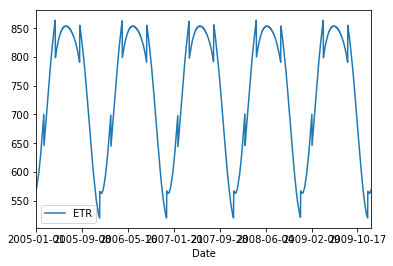

In [15]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('miamidata.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [16]:
# split the dataset
from pandas import read_csv
series = read_csv('miamidata.csv', header=0, index_col=0)
split_point = len(series) - 365
dataset, validation = series[0:split_point], series[split_point:]
print('Miami Train %d, Miami Test %d' % (len(dataset), len(validation)))
dataset.to_csv('miamitrain.csv', index=False)
validation.to_csv('miamitest.csv', index=False)

Miami Train 1461, Miami Test 365


# One-Step Out of Sample Forecast - ARIMA (1,0,1)

In [18]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [19]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 570.208575


### Take-Aways
* This is the forecast for the first day in the test data set.
* The real value for this day, January 1st 2009, is 571.
* The model is very accurate with its predicted ETR value of 570.

# One-Step Out of Sample Forecast - ARIMA (1,0,0)

In [20]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [21]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# fit model
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 570.124389


### Take-Aways
* Although the forecast is still close to the real value, ARIMA (1,0,1) did a fractionally better job of predicting the value.